In [30]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [31]:
text = "Helped come up with ways to improve idea and presentation Worked on developing iterations of idea and completing each milestone	Spent a lot of time working on CAD for project	Went to in person labs and handled/assembled physical printouts of projects"
# would ideally look like:
# text = pd.concat(categorical_question_responses)

In [32]:
tokens = [t for t in text.split()]
print(tokens)

['Helped', 'come', 'up', 'with', 'ways', 'to', 'improve', 'idea', 'and', 'presentation', 'Worked', 'on', 'developing', 'iterations', 'of', 'idea', 'and', 'completing', 'each', 'milestone', 'Spent', 'a', 'lot', 'of', 'time', 'working', 'on', 'CAD', 'for', 'project', 'Went', 'to', 'in', 'person', 'labs', 'and', 'handled/assembled', 'physical', 'printouts', 'of', 'projects']


Helped:1
come:1
ways:1
improve:1
idea:2
presentation:1
Worked:1
developing:1
iterations:1
completing:1
milestone:1
Spent:1
lot:1
time:1
working:1
CAD:1
project:1
Went:1
person:1
labs:1
handled/assembled:1
physical:1
printouts:1
projects:1


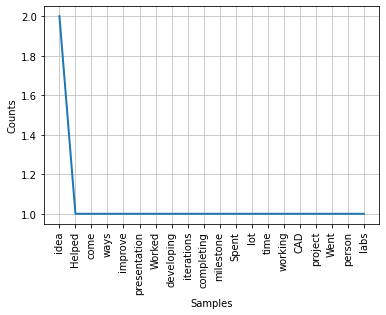

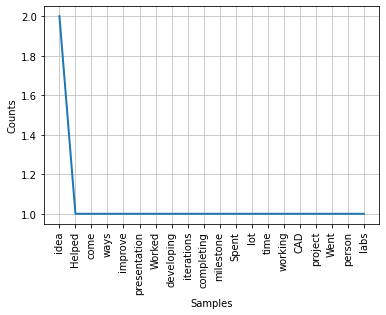

In [33]:
from nltk.corpus import stopwords
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
freq.plot(20, cumulative=False).figure

In [34]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
# tag parts of speech
sentence = word_tokenize(text)
pos_tag(sentence)

[('Helped', 'VBD'),
 ('come', 'VB'),
 ('up', 'RP'),
 ('with', 'IN'),
 ('ways', 'NNS'),
 ('to', 'TO'),
 ('improve', 'VB'),
 ('idea', 'NN'),
 ('and', 'CC'),
 ('presentation', 'NN'),
 ('Worked', 'VBN'),
 ('on', 'IN'),
 ('developing', 'VBG'),
 ('iterations', 'NNS'),
 ('of', 'IN'),
 ('idea', 'NN'),
 ('and', 'CC'),
 ('completing', 'VBG'),
 ('each', 'DT'),
 ('milestone', 'NN'),
 ('Spent', 'VBD'),
 ('a', 'DT'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('time', 'NN'),
 ('working', 'VBG'),
 ('on', 'IN'),
 ('CAD', 'NNP'),
 ('for', 'IN'),
 ('project', 'NN'),
 ('Went', 'NNP'),
 ('to', 'TO'),
 ('in', 'IN'),
 ('person', 'NN'),
 ('labs', 'NNS'),
 ('and', 'CC'),
 ('handled/assembled', 'VBD'),
 ('physical', 'JJ'),
 ('printouts', 'NNS'),
 ('of', 'IN'),
 ('projects', 'NNS')]

In [35]:
verbs = []
adjectives = []
for i in pos_tag(sentence):
    if 'VB' in i[1]:
        verbs.append(i)
    elif 'JJ' in i[1]:
        adjectives.append(i)

In [36]:
questions = pd.read_csv('textual_join.csv')

In [37]:
def questionFinder(df):
    allColumnNames = list(df.columns)
    # Dependent that column names are 'Q' followed by a number, then any combination of alphanumeric characters 
    pattern = r'Q[0-9, _, .]+'
    matches = [(re.findall(pattern, columnName)) for columnName in allColumnNames]
    listOfQuestions = [element for sublist in matches for element in sublist]
    return listOfQuestions

In [39]:
text_qs = questionFinder(questions)
text_qs

['Q31',
 'Q35',
 'Q37',
 'Q7',
 'Q9',
 'Q11',
 'Q16_1',
 'Q16_2',
 'Q16_3',
 'Q16_4',
 'Q16_6',
 'Q16_7',
 'Q21_1',
 'Q21_2',
 'Q21_3',
 'Q21_4',
 'Q21_6',
 'Q21_7']

In [40]:
for i in text_qs:
    print(questions[i])

0     getting to know the steps to manufacturing and...
1     Our team's shared goal is to develop a deep un...
2     Have fun, explore and develop and understandin...
3                             Having a complete project
4     To create an amazing device of helping consume...
                            ...                        
70    Collaborate to make an awesome final product a...
71    My team's shared goal was to support one anoth...
72    To finalize the project and create the deliver...
73    Work together to improve our understanding of ...
74    To learn about different prototyping processes...
Name: Q31, Length: 75, dtype: object
0                                    good communication
1                                        Communication 
2     Communicate clearly about what our golas were ...
3                                        finish on time
4     I recommend having strong communication throug...
                            ...                        
70    I thi

In [ ]:
primary_contribution